# Snippet Creator and Hacking Space 

Hacking space. 

Use snippets.py (previously dm.py) or whatever for the code... 

## Provenance

* dm.ipynb renamed snippet_runner.ipynb to coordinate with snippets.py
* Moved into agg project, untracked June 28, 2022
* Created new as Learning_SLY June 23, 2022

In [ ]:
# see the parser
%run aggregate/parser.py

In [11]:
agg.parser.UnderwritingParser.enhance_debugfile()

time: 16 ms (started: 2022-07-07 21:42:59 -04:00)


In [1]:
logger_level(30)
%run -i snippets.py

time: 703 ms (started: 2022-07-07 21:48:18 -04:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
# save grammar 
agg.grammar()

# Easter Egg

Awkward easter egg... 

# NewCo Re Capital Model

## Effect on the tail of adding cat...really depends on the relative vol of non-cat.

In [31]:
out = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  20000+7000 cv ((20000*.075)**2 + (7000*0.15)**2)**0.5 / 27000 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=1)

updating with 17, bs=1/1.0
time: 1.91 s (started: 2022-07-04 09:12:34 -04:00)


In [48]:
out = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  27000 cv .01 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=2)

updating with 17, bs=1/1.0
time: 1.77 s (started: 2022-07-04 09:20:55 -04:00)


In [ ]:
port = out[('port', 'newco')][0]
port

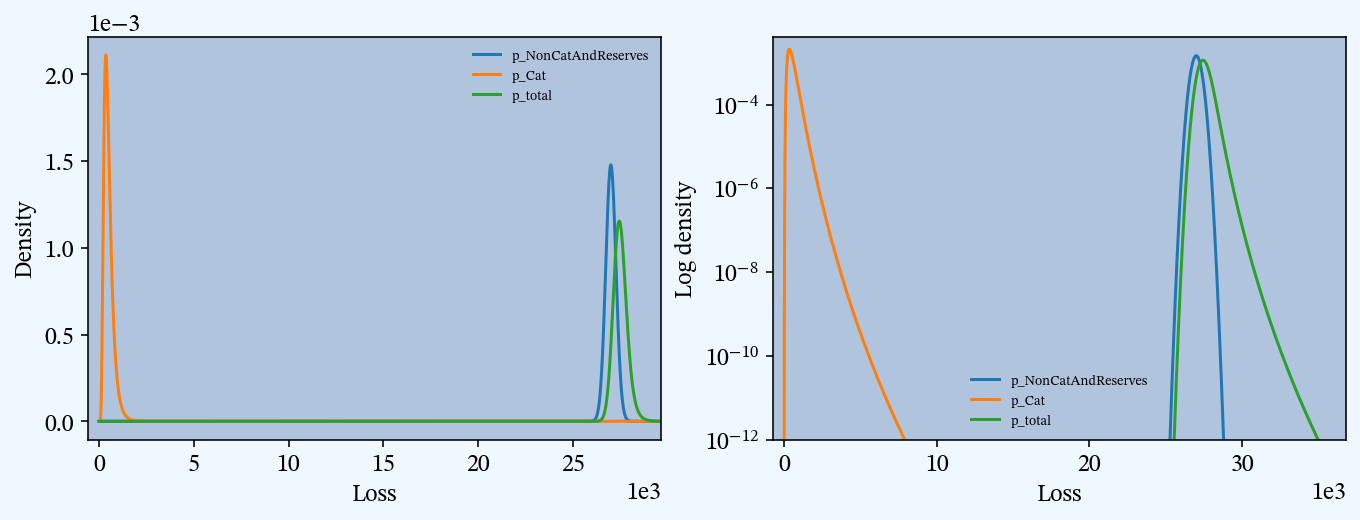

time: 2.08 s (started: 2022-07-04 09:21:12 -04:00)


In [50]:
port.plot()

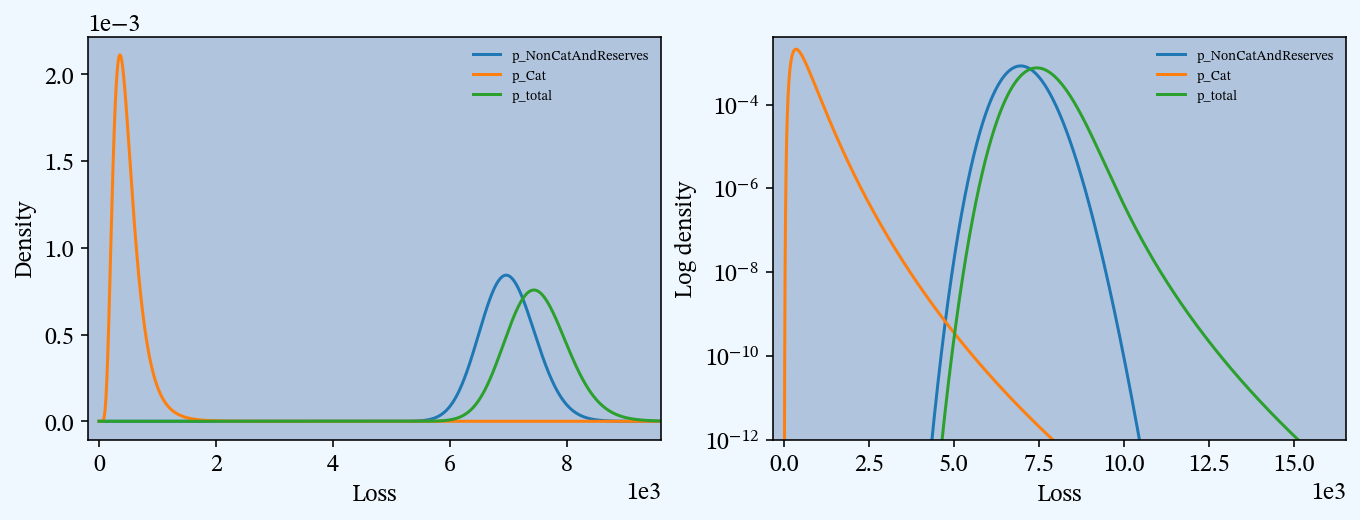

time: 1.19 s (started: 2022-07-04 09:11:29 -04:00)


In [28]:
port.plot()

In [51]:
df = port.density_df

time: 15 ms (started: 2022-07-04 09:21:26 -04:00)


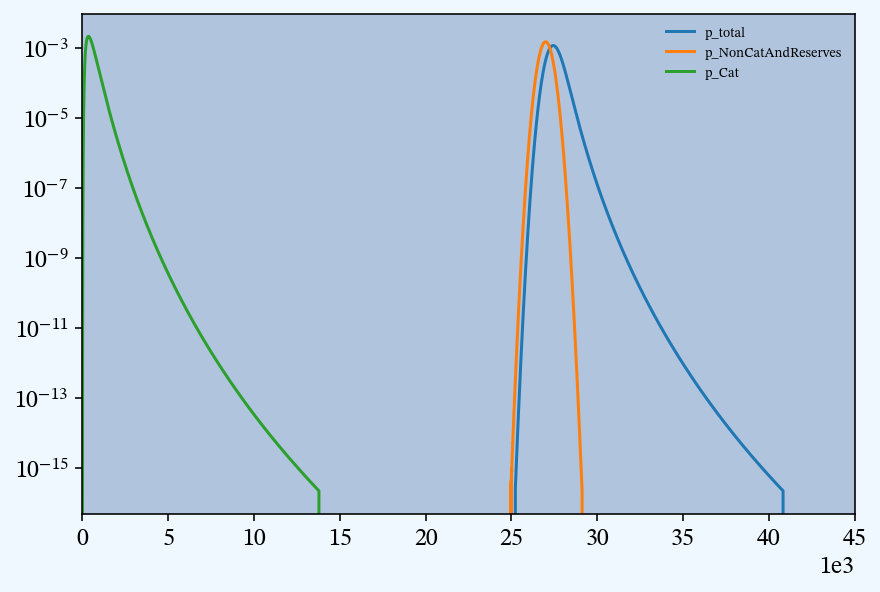

time: 828 ms (started: 2022-07-04 09:21:26 -04:00)


In [52]:
%%sf 1 1 6 4 

(df.p_total).plot(ax=ax, logy=True)
(df.p_NonCatAndReserves).plot(ax=ax, logy=True)
(df.p_Cat).plot(ax=ax, logy=True)
ax.set(xlim=[0, 45e3])
ax.legend()

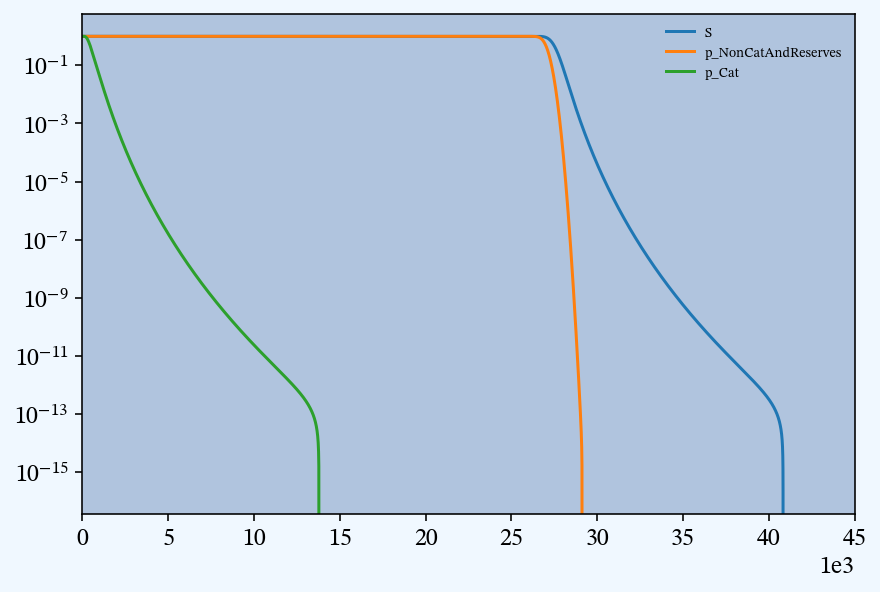

time: 843 ms (started: 2022-07-04 09:21:33 -04:00)


In [53]:
%%sf 1 1 6 4 

(df.S).plot(ax=ax, logy=True)
(df.p_NonCatAndReserves[::-1].cumsum().shift(1)).plot(ax=ax, logy=True)
(df.p_Cat[::-1].cumsum().shift(1)).plot(ax=ax, logy=True)
ax.set(xlim=[0, 45e3])
ax.legend()

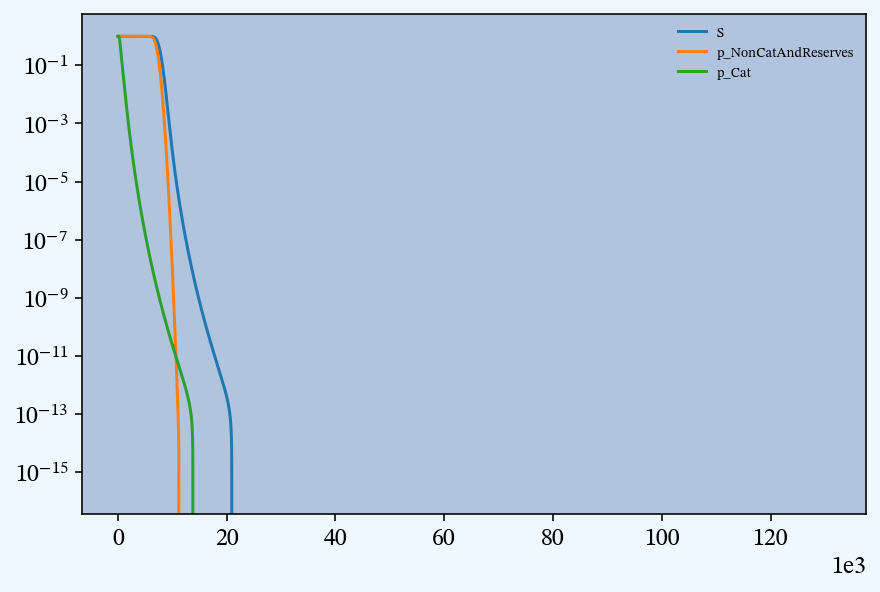

time: 844 ms (started: 2022-07-04 09:11:36 -04:00)


In [30]:
%%sf 1 1 6 4 

(df.S).plot(ax=ax, logy=True)
(df.p_NonCatAndReserves[::-1].cumsum().shift(1)).plot(ax=ax, logy=True)
(df.p_Cat[::-1].cumsum().shift(1)).plot(ax=ax, logy=True)
ax.legend()

In [54]:
cs.enhance_portfolio(port)

time: 0 ns (started: 2022-07-04 09:21:42 -04:00)


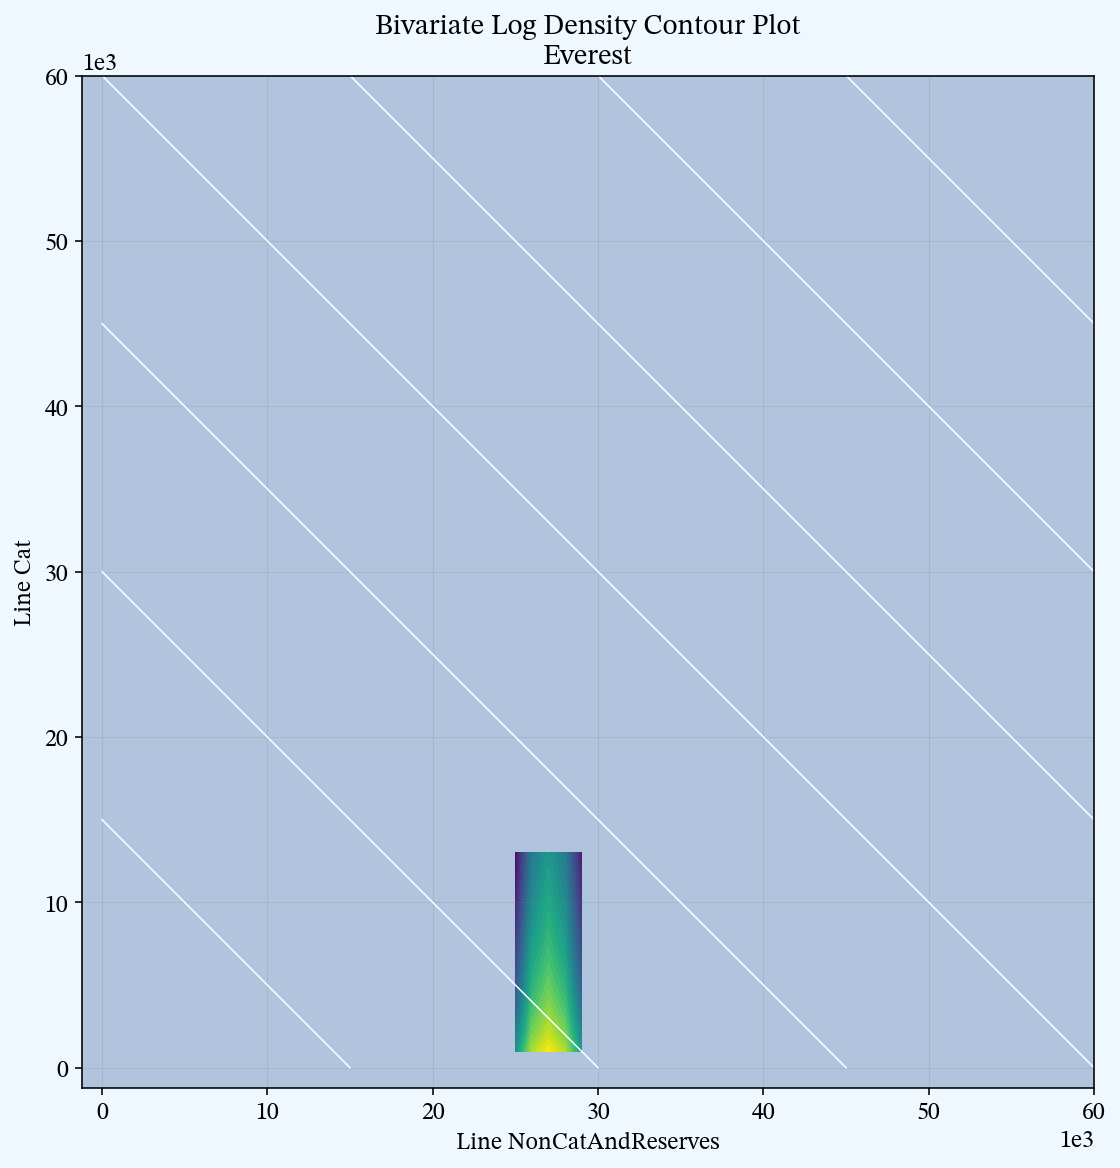

time: 281 ms (started: 2022-07-04 09:21:42 -04:00)


In [55]:
%%sf 1 1 8 8 
port.biv_contour_plot(f, ax, 0, 60e3, 1e3, cmap='viridis')

## Discrete

In [1]:
logger_level(30)
%run -i snippets.py

time: 688 ms (started: 2022-07-05 07:53:00 -04:00)


Parser debugging for UnderwritingParser written to c:\temp\parser.out


In [11]:
discrete_eq = cs.CaseStudy()
discrete_eq.factory(case_id='discrete_equal_new',
                   case_name='Discrete Case, equal points',
                   case_description='Discrete Case, equal points, in the new syntax.',
                   a_distribution       = 'agg X1 1 claim dsev [0 9 10] [1/2 1/4 1/4] fixed',
                   b_distribution_gross = 'agg X2 1 claim dsev [0 1 90] [1/2 1/4 1/4] fixed',
                   b_distribution_net   =f'agg X2 1 claim dsev [0 1 90] [1/2 1/4 1/4] fixed aggregate net of 70 xs 20',
                   reg_p=1,
                   roe=0.10,
                   d2tc=0.3,
                   f_discrete=True, 
                   f_blend_extend=True,
                   bs=1,
                   log2=8,
                   padding=1)

time: 953 ms (started: 2022-07-05 07:59:26 -04:00)


In [ ]:
discrete_eq.full_monty()

## Tame in New Syntax

In [1]:
logger_level(30)
%run -i snippets.py

time: 734 ms (started: 2022-07-07 21:23:02 -04:00)


Parser debugging for UnderwritingParser written to c:\temp\parser.out


In [2]:
recalc = build('agg B 1 claim sev gamma  50 cv 0.15 fixed', log2=16, bs=1/64)
a, d = recalc.q(0.8), recalc.q(0.99)
y = d - a
y, a, d

(12.90625, 56.171875, 69.078125)

time: 344 ms (started: 2022-07-07 21:23:03 -04:00)


In [3]:
tame = cs.CaseStudy()
tame.factory(case_id='tame_new',
                   case_name='Tame Case',
                   case_description='Tame Case in the new syntax.',
                   a_distribution       = 'agg A 1 claim sev gamma  50 cv 0.10 fixed',
                   b_distribution_gross = 'agg B 1 claim sev gamma  50 cv 0.15 fixed',
                   b_distribution_net   =f'agg B 1 claim sev gamma  50 cv 0.15 fixed aggregate net of {y} xs {a}',
                   reg_p=0.999,
                   roe=0.10,
                   d2tc=0.3,
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1/64,
                   log2=16,
                   padding=1)

time: 2.91 s (started: 2022-07-07 21:23:04 -04:00)


In [4]:
tame.full_monty()

23:09.222| 450|Level 35  | aggregate, full_monty|  Start Full Monty Update
23:09.278|5075|Level 35  | aggregate, process_memory|  Memory usage = 0.400GB: |====
23:09.279|2300|Level 35  | aggregate, make_all|  boundss and pstar done
23:09.457|5075|Level 35  | aggregate, process_memory|  Memory usage = 0.401GB: |====
23:09.458|2303|Level 35  | aggregate, make_all|  classic pricing done
23:09.788|5075|Level 35  | aggregate, process_memory|  Memory usage = 0.408GB: |====
23:09.789|2306|Level 35  | aggregate, make_all|  modern monoline done
23:12.129|5075|Level 35  | aggregate, process_memory|  Memory usage = 0.935GB: |==========
23:12.130|2309|Level 35  | aggregate, make_all|  ad comps done
23:12.333|5075|Level 35  | aggregate, process_memory|  Memory usage = 1.013GB: |==========
23:12.334|2312|Level 35  | aggregate, make_all|  apply distortions done
23:12.366|5075|Level 35  | aggregate, process_memory|  Memory usage = 0.960GB: |==========
23:12.367|2315|Level 35  | aggregate, make_all|  B

time: 44.1 s (started: 2022-07-07 21:23:09 -04:00)


In [13]:
df = build.interpreter_file()

time: 78 ms (started: 2022-07-07 21:31:19 -04:00)


In [14]:
df

,type,error,name,interpreted,program,raw_input
Comment3,agg,1,Comment3,"Token(type='ID', value='note', lineno=1, index=46)",agg Test3 1 claim sev lognorm 3 cv .3 poisson note{fails: comment in note,agg Test3 1 claim sev lognorm 3 cv .3 poisson note{fails: comment in note //...
LimitProfile2,agg,0,LimitProfile2:,"{'name': 'LimitProfile2:', 'exp_en': 5.0, 'exp_attachment': 10.0, 'exp_limit...",agg LimitProfile2: 5 claim [10 20 50 100] xs 10 sev lognorm 10 cv 1.2 wt ...,
MixedLine7,agg,0,MixedLine7,"{'name': 'MixedLine7', 'exp_en': 1.0, 'sev_name': 'beta', 'sev_a': [1.0, 200...",agg MixedLine7 1 claim sev 100 @ beta [1 200 500 100] [100 800 500 1] ...,
MixedLine6,agg,0,MixedLine6:,"{'name': 'MixedLine6:', 'exp_en': 50.0, 'sev_name': 'lognorm', 'sev_mean': 1...",agg MixedLine6: 50 claims sev lognorm 12 cv [.75 1 .25] wt [.3 .5 ...,
MixedLine5,agg,0,MixedLine5:,"{'name': 'MixedLine5:', 'exp_en': 1.0, 'exp_attachment': 0.0, 'exp_limit': 5...","agg MixedLine5: 1 claim 50 xs 0 sev lognorm [10, 15, 20, 25, 50] cv [0.2...",
MixedLine4,agg,0,MixedLine4:,"{'name': 'MixedLine4:', 'exp_en': 1.0, 'exp_attachment': 0.0, 'exp_limit': 5...","agg MixedLine4: 1 claim 50 xs 0 sev lognorm 10 cv [0.2, 0.4, 0.6, 0.8, 1.0...",
MixedLine3,agg,0,MixedLine3:,"{'name': 'MixedLine3:', 'exp_en': 1.0, 'exp_attachment': 0.0, 'exp_limit': 5...","agg MixedLine3: 1 claim 50 xs 0 sev lognorm 10 cv [0.2, 0.4, 0.6, 0.8, 1.0...",
MixedLine1,agg,0,MixedLine1:,"{'name': 'MixedLine1:', 'exp_en': 1.0, 'exp_attachment': 0.0, 'exp_limit': 5...","agg MixedLine1: 1 claim 50 xs 0 sev lognorm 10 cv [0.2, 0.4, 0.6, 0.8, 1.0...",
Example2XoLUC,agg,0,Example2XoLUC,"{'name': 'Example2XoLUC', 'exp_en': 10.0, 'exp_attachment': 100.0, 'exp_limi...",agg Example2XoLUC 10 claims inf xs 100 sev lognorm 25 cv 1.0 ! poisson,
Example2XoL,agg,0,Example2XoL,"{'name': 'Example2XoL', 'exp_en': 10.0, 'exp_attachment': 100.0, 'exp_limit'...",agg Example2XoL 10 claims inf xs 100 sev lognorm 25 cv 1.0 poisson,


time: 94 ms (started: 2022-07-07 21:31:23 -04:00)


In [12]:
df.loc['parsetest2', 'program']

'agg parsetest2 5 claims sev  gamma  -0.19 - 1 + 10 cv .5 # 3 net of 1 po 3 xs 2 occurrence  poisson note{this fails if written -(13.9 + 6)}'

time: 0 ns (started: 2022-07-07 21:28:36 -04:00)


## CNC in New Syntax

In [1]:
logger_level(30)
%run -i snippets.py

time: 750 ms (started: 2022-07-04 21:14:56 -04:00)


Parser debugging for UnderwritingParser written to c:\temp\parser.out


In [2]:
recalc = build('agg Cat    1 claim sev lognorm  20 cv 1.00 fixed', log2=16, bs=1/64)
a, d = recalc.q(0.9), recalc.q(0.995)
y = d - a
y, a, d

(79.640625, 41.109375, 120.75)

time: 375 ms (started: 2022-07-04 21:14:59 -04:00)


In [ ]:
cnc = cs.CaseStudy()
cnc.factory(case_id='cnc_new',
                   case_name='Cat/Non-Cat',
                   case_description='Cat/Non-Cat in the new syntax.',
                   a_distribution       = 'agg NonCat 1 claim sev gamma    80 cv 0.15 fixed',
                   b_distribution_gross = 'agg Cat    1 claim sev lognorm  20 cv 1.00 fixed',
                   b_distribution_net   =f'agg Cat    1 claim sev lognorm  20 cv 1.00 fixed aggregate net of {y} xs {a}',
                   reg_p=0.999,
                   roe=0.10,
                   d2tc=0.3,
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1/64,
                   log2=16,
                   padding=1)

In [ ]:
cnc.full_monty()

## HS in New Syntax (with Book style reinsurance)

In [1]:
logger_level(30)
%run -i snippets.py

time: 703 ms (started: 2022-07-05 08:19:26 -04:00)


Parser debugging for UnderwritingParser written to c:\temp\parser.out


In [2]:
recalc = build('sev Husev  15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5')
a, d = recalc.isf(0.05), recalc.isf(0.005)
y = d - a
y, a, d

(372.4067840300255, 40.25298926180363, 412.65977329182914)

time: 15 ms (started: 2022-07-05 08:19:27 -04:00)


In [3]:
hs = cs.CaseStudy()
hs.factory(case_id='hs',
                   case_name='Hu/SCS',
                   case_description='Hu/SCS Case in the new syntax with aggregate reinsurance (book).',
                   a_distribution       = 'agg SCS 70 claims sev exp(0 - 1.9**2 / 2)      @ lognorm 1.9 poisson',
                   b_distribution_gross = 'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 poisson',
                   b_distribution_net   =f'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 poisson aggregate net of {y} xs {a}',
                   reg_p=0.999,
                   roe=0.10,
                   d2tc=0.3,
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1/4,
                   log2=19,
                   padding=1)
hs.to_json()

19:28.150|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
19:28.151|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
19:28.609|3098|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
19:28.875|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
19:28.876|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm 

{'case_id': 'hs',
 'case_name': 'Hu/SCS',
 'case_description': 'Hu/SCS Case in the new syntax with aggregate reinsurance (book).',
 'a_distribution': 'agg SCS 70 claims sev exp(0 - 1.9**2 / 2)      @ lognorm 1.9 poisson',
 'b_distribution_gross': 'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 poisson',
 'b_distribution_net': 'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 poisson aggregate net of 372.4067840300255 xs 40.25298926180363',
 'reg_p': 0.999,
 'roe': 0.1,
 'd2tc': 0.3,
 'f_discrete': False,
 'f_blend_extend': False,
 'bs': 0.25,
 'log2': 19,
 'padding': 1}

time: 19.1 s (started: 2022-07-05 08:19:27 -04:00)


In [4]:
hs.full_monty()

19:47.005| 445|Level 35  | aggregate, full_monty|  Start Full Monty Update
19:47.058|5070|Level 35  | aggregate, process_memory|  Memory usage = 2.020GB: |=====================
19:47.060|2295|Level 35  | aggregate, make_all|  boundss and pstar done


Exponential Failed to converge after 50 iterations, value is 6.474721801580881e-05.
Esscher Failed to converge after 50 iterations, value is 3.556269504526151e-05.


19:48.831|5070|Level 35  | aggregate, process_memory|  Memory usage = 2.020GB: |=====================
19:48.832|2298|Level 35  | aggregate, make_all|  classic pricing done
19:50.355|5070|Level 35  | aggregate, process_memory|  Memory usage = 2.053GB: |======================
19:50.356|2301|Level 35  | aggregate, make_all|  modern monoline done
20:22.349|5070|Level 35  | aggregate, process_memory|  Memory usage = 8.505GB: |===========================================================================================
20:22.350|2304|Level 35  | aggregate, make_all|  ad comps done
20:26.610|5070|Level 35  | aggregate, process_memory|  Memory usage = 9.497GB: |=====================================================================================================
20:26.611|2307|Level 35  | aggregate, make_all|  apply distortions done
20:27.296|5070|Level 35  | aggregate, process_memory|  Memory usage = 9.629GB: |======================================================================================

time: 1min 33s (started: 2022-07-05 08:19:47 -04:00)


## Correct HS with actual per occ reins

In [1]:
logger_level(30)
%run -i snippets.py

time: 719 ms (started: 2022-07-05 08:15:33 -04:00)


Parser debugging for UnderwritingParser written to c:\temp\parser.out


In [2]:
recalc = build('sev Husev  15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5')
a, d = recalc.isf(0.05), recalc.isf(0.005)
y = d - a
y, a, d

(372.4067840300255, 40.25298926180363, 412.65977329182914)

time: 0 ns (started: 2022-07-05 08:15:33 -04:00)


In [3]:
hs2 = cs.CaseStudy()
hs2.factory(case_id='hs_per_occ',
                   case_name='Hu/SCS',
                   case_description='Hu/SCS Case in the new syntax with per occurrence reinsurance .',
                   a_distribution       = 'agg SCS 70 claims sev exp(0 - 1.9**2 / 2)      @ lognorm 1.9 poisson',
                   b_distribution_gross = 'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 poisson',
                   b_distribution_net   =f'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 occurrence net of {y} xs {a} poisson',
                   reg_p=0.999,
                   roe=0.10,
                   d2tc=0.3,
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1/4,
                   log2=19,
                   padding=1)
hs2.to_json()

15:34.460|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
15:34.461|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
15:34.930|3098|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
15:35.208|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
15:35.209|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm 

{'case_id': 'hs_per_occ',
 'case_name': 'Hu/SCS',
 'case_description': 'Hu/SCS Case in the new syntax with per occurrence reinsurance .',
 'a_distribution': 'agg SCS 70 claims sev exp(0 - 1.9**2 / 2)      @ lognorm 1.9 poisson',
 'b_distribution_gross': 'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 poisson',
 'b_distribution_net': 'agg Hu   2 claims sev 15 * exp(0 - 2.5**2 / 2) @ lognorm 2.5 occurrence net of 372.4067840300255 xs 40.25298926180363 poisson',
 'reg_p': 0.999,
 'roe': 0.1,
 'd2tc': 0.3,
 'f_discrete': False,
 'f_blend_extend': False,
 'bs': 0.25,
 'log2': 19,
 'padding': 1}

time: 19.9 s (started: 2022-07-05 08:15:34 -04:00)


In [4]:
hs2.gross

,Hu,SCS,total
"(freq, mean)",2.000,70.000,72.000
"(sev, mean)",15.000,1.000,1.389
"(agg, mean)",30.000,70.000,100.000
"(freq, cv)",707.107m,119.523m,117.851m
"(sev, cv)",22.735,5.997,41.177
"(agg, cv)",16.092,726.697m,4.854
"(freq, skew)",707.107m,119.523m,117.851m
"(sev, skew)",9.076k,232.344,53.453k
"(agg, skew)",6.399k,26.709,6.294k
Mean,30.000,70.000,100.000


time: 16 ms (started: 2022-07-05 08:16:18 -04:00)


In [5]:
hs2.full_monty()

16:30.601| 445|Level 35  | aggregate, full_monty|  Start Full Monty Update
16:30.655|5070|Level 35  | aggregate, process_memory|  Memory usage = 2.020GB: |=====================
16:30.656|2295|Level 35  | aggregate, make_all|  boundss and pstar done


Exponential Failed to converge after 50 iterations, value is 6.474721801580881e-05.
Esscher Failed to converge after 50 iterations, value is 3.556269504526151e-05.


16:32.416|5070|Level 35  | aggregate, process_memory|  Memory usage = 2.020GB: |=====================
16:32.417|2298|Level 35  | aggregate, make_all|  classic pricing done
16:34.012|5070|Level 35  | aggregate, process_memory|  Memory usage = 2.053GB: |======================
16:34.012|2301|Level 35  | aggregate, make_all|  modern monoline done
17:06.934|5070|Level 35  | aggregate, process_memory|  Memory usage = 8.504GB: |===========================================================================================
17:06.934|2304|Level 35  | aggregate, make_all|  ad comps done
17:11.201|5070|Level 35  | aggregate, process_memory|  Memory usage = 9.497GB: |=====================================================================================================
17:11.201|2307|Level 35  | aggregate, make_all|  apply distortions done
17:12.021|5070|Level 35  | aggregate, process_memory|  Memory usage = 9.629GB: |======================================================================================

time: 1min 33s (started: 2022-07-05 08:16:30 -04:00)


## Capital Model Case new Syntax

In [1]:
logger_level(30)
%run -i snippets.py

time: 750 ms (started: 2022-07-04 21:27:23 -04:00)


Parser debugging for UnderwritingParser written to c:\temp\parser.out


In [6]:
newco = cs.CaseStudy()
newco.factory(case_id='newco',
                   case_name='NewCo Capital Model',
                   case_description='description goes here',
                   a_distribution      ='agg NonCat 1 claim sev gamma    7000 cv 0.05 # 20000 fixed',
                   b_distribution_gross='agg Cat    1 claim sev lognorm  1500 cv 0.750 fixed',
                   b_distribution_net  ='agg Cat    1 claim sev lognorm  1500 cv 0.750 fixed aggregate net of 3000 xs 500',
                   reg_p=0.9995,
                   roe=0.09,
                   d2tc=2.5/10,
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1,
                   log2=16,
                   padding=1)

time: 2.89 s (started: 2022-07-04 21:28:10 -04:00)


In [7]:
newco.full_monty()

28:15.075| 385|Level 35  | aggregate, full_monty|  Start Full Monty Update
28:15.145|5391|Level 35  | aggregate, process_memory|  Memory usage = 0.419GB: |====
28:15.146|2238|Level 35  | aggregate, make_all|  boundss and pstar done
28:15.244|2494|WARNING   | aggregate.port, calibrate_distortion|  Portfolio.calibrate_distortion | Questionable convergenge! tvar, target 29270.55640693034 error 0.00045395336564979516, 200 iterations
28:15.421|5391|Level 35  | aggregate, process_memory|  Memory usage = 0.421GB: |====
28:15.422|2241|Level 35  | aggregate, make_all|  classic pricing done
28:15.748|5391|Level 35  | aggregate, process_memory|  Memory usage = 0.426GB: |====
28:15.749|2244|Level 35  | aggregate, make_all|  modern monoline done
28:20.246|5391|Level 35  | aggregate, process_memory|  Memory usage = 1.242GB: |=============
28:20.247|2247|Level 35  | aggregate, make_all|  ad comps done
28:20.668|5391|Level 35  | aggregate, process_memory|  Memory usage = 1.365GB: |==============
28:20

time: 47.7 s (started: 2022-07-04 21:28:15 -04:00)


# Book Case Studies Redux

In [1]:
logger_level(30)
%run -i snippets.py

Parser debugging for UnderwritingParser written to c:\temp\parser.out


time: 2.3 s (started: 2022-07-04 12:16:12 -04:00)


In [2]:
case = cs.CaseStudy()
case.factory_book('cnc')

In [ ]:
case.full_monty()

In [4]:
mrm = cs.ManualRenderResults()
p, p1 = mrm.render('cnc')

time: 203 ms (started: 2022-07-04 13:11:34 -04:00)


In [6]:
case.gross.Cat.q(0.99), case.net.Cat.q(0.99), case.gross.Cat.q(0.996), case.net.Cat.q(0.996), case.gross.Cat.q(0.999), case.net.Cat.q(0.999)

(98.09375, 41.109375, 128.65625, 49.015625, 185.28125, 105.640625)

time: 0 ns (started: 2022-07-04 13:15:08 -04:00)


# Cat Bond Model

600M el, about 100M ceded to cat bonds with limits of 2.325B occ and add.

In [138]:
c = build('agg ALLCAT4 [10 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.3', log2=18, bs=1)
d = build('agg ALLCATNET [10 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.3 aggregate net of 1325 xs 800', log2=18, bs=1)

39:46.735|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
39:46.736|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
39:47.188|3098|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


time: 1.33 s (started: 2022-07-05 14:39:46 -04:00)


In [145]:
1/.00386

259.0673575129534

time: 0 ns (started: 2022-07-05 14:44:30 -04:00)


In [155]:
b = build('agg NONCAT 1 claim sev gamma 2 cv 0.5 # 25 fixed', bs=1/64)

time: 157 ms (started: 2022-07-05 14:46:45 -04:00)


In [154]:
b.q(0.8),b.q(0.9),b.q(0.95),b.q(0.99),b.q(0.995),b.q(0.999),b.q(0.9999)

(27.546875, 27.9375, 28.265625, 28.96875, 29.25, 29.875, 30.6875)

time: 16 ms (started: 2022-07-05 14:46:36 -04:00)


In [139]:
d

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,50.000,46.499,-70.025m,2.431,1.967,-190.630m,35.827
Freq,12.000,,,416.333m,,,632.506m
Agg,600.000,501.335,-164.442m,815.884m,564.088m,-308.617m,7.134


time: 16 ms (started: 2022-07-05 14:39:47 -04:00)


In [157]:
cs.CaseStudy.list_cases()

C:\Users\steve\aggregate\cases\discrete_equal_new.json
C:\Users\steve\aggregate\cases\hs.json
C:\Users\steve\aggregate\cases\hs_per_occ.json
time: 0 ns (started: 2022-07-05 14:49:13 -04:00)


In [ ]:
c = build('agg CAT [10 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.3', log2=18, bs=1)
d = build('agg CATNET [10 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.3 aggregate net of 1325 xs 800', log2=18, bs=1)

In [163]:
newco = cs.CaseStudy()
newco.factory(case_id='newco',
                   case_name='NewCo Capital Model',
                   case_description='NewCo capital model in new syntax.',
                   a_distribution       = 'agg NONCAT 1 claim sev gamma 2000 cv 0.5 # 25000 fixed',
                   b_distribution_gross = 'agg CAT [10 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.3',
                   b_distribution_net   = 'agg CAT [10 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.3 aggregate net of 1325 xs 800',
                   reg_p=0.9999,
                   roe=0.085,
                   d2tc=0.3,
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1,
                   log2=18,
                   padding=1)

53:56.911|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
53:56.911|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
53:57.412|3098|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
54:00.737|3087|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
54:00.737|3092|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm 

time: 11.3 s (started: 2022-07-05 14:53:56 -04:00)


In [166]:
newco.full_monty()

54:45.774| 450|Level 35  | aggregate, full_monty|  Start Full Monty Update
54:45.868|5075|Level 35  | aggregate, process_memory|  Memory usage = 3.493GB: |=====================================
54:45.869|2300|Level 35  | aggregate, make_all|  boundss and pstar done
54:45.960|2494|WARNING   | aggregate.port, calibrate_distortion|  Portfolio.calibrate_distortion | Questionable convergenge! tvar, target 28079.918574190153 error 0.005582687099376926, 200 iterations


Exponential Failed to converge after 50 iterations, value is 5.72736923475482e-05.


54:46.954|5075|Level 35  | aggregate, process_memory|  Memory usage = 3.494GB: |=====================================


Esscher Failed to converge after 50 iterations, value is 2.4213638764368287e-05.


54:46.955|2303|Level 35  | aggregate, make_all|  classic pricing done
54:47.781|5075|Level 35  | aggregate, process_memory|  Memory usage = 3.510GB: |=====================================
54:47.782|2306|Level 35  | aggregate, make_all|  modern monoline done
55:04.639|5075|Level 35  | aggregate, process_memory|  Memory usage = 6.738GB: |========================================================================
55:04.640|2309|Level 35  | aggregate, make_all|  ad comps done
55:06.645|5075|Level 35  | aggregate, process_memory|  Memory usage = 7.235GB: |=============================================================================
55:06.646|2312|Level 35  | aggregate, make_all|  apply distortions done
55:07.084|5075|Level 35  | aggregate, process_memory|  Memory usage = 7.301GB: |==============================================================================
55:07.085|2315|Level 35  | aggregate, make_all|  Bodoff exhibits done
55:07.086|5075|Level 35  | aggregate, process_memory|  Memory usage

time: 1min 7s (started: 2022-07-05 14:54:45 -04:00)


In [167]:
newco.to_json()

{'case_id': 'newco',
 'case_name': 'NewCo Capital Model',
 'case_description': 'NewCo capital model in new syntax.',
 'a_distribution': 'agg NONCAT 1 claim sev gamma 2000 cv 0.5 # 25000 fixed',
 'b_distribution_gross': 'agg CAT [10 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.3',
 'b_distribution_net': 'agg CAT [10 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.3 aggregate net of 1325 xs 800',
 'reg_p': 0.999,
 'roe': 0.1,
 'd2tc': 0.3,
 'f_discrete': False,
 'f_blend_extend': True,
 'bs': 1,
 'log2': 18,
 'padding': 1}

time: 0 ns (started: 2022-07-05 14:55:55 -04:00)


In [164]:
newco.gross

,CAT,NONCAT,total
"(freq, mean)",12.000,1.000,13.000
"(sev, mean)",50.000,27.000k,2.123k
"(agg, mean)",600.000,27.000k,27.600k
"(freq, cv)",416.333m,0.000,384.308m
"(sev, cv)",2.431,37.037m,3.385
"(agg, cv)",815.884m,37.037m,40.340m
"(freq, skew)",632.506m,NaN,632.506m
"(sev, skew)",35.827,1.000,3.183
"(agg, skew)",7.134,1.000,1.331
Mean,600.000,27.000k,27.600k


time: 16 ms (started: 2022-07-05 14:54:07 -04:00)


In [165]:
newco.net

,CAT,NONCAT,total
"(freq, mean)",12.000,1.000,13.000
"(sev, mean)",50.000,27.000k,2.123k
"(agg, mean)",600.000,27.000k,27.600k
"(freq, cv)",416.333m,0.000,384.308m
"(sev, cv)",2.431,37.037m,3.385
"(agg, cv)",815.884m,37.037m,40.340m
"(freq, skew)",632.506m,NaN,632.506m
"(sev, skew)",35.827,1.000,3.183
"(agg, skew)",7.134,1.000,1.331
Mean,600.000,27.000k,27.600k


time: 16 ms (started: 2022-07-05 14:54:07 -04:00)


In [8]:
x = range(10)

time: 0 ns (started: 2022-07-07 21:57:08 -04:00)


In [9]:
next(x)

TypeError: 'range' object is not an iterator

time: 485 ms (started: 2022-07-07 21:57:09 -04:00)
